In [17]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [18]:
mu = 0
a, b = -.5, .5
delta, m = 1, 2
alpha, off = 1, 1

In [19]:
def tilde(x, delta=0, m=0):
    return np.sqrt(2) * x - (m+delta)/np.sqrt(2)

In [20]:
def phi(t):
    return (1/np.sqrt(2 * np.pi)) * np.exp(-(t**2) / 2)

In [21]:
def PHI(x, loc=0, scale=1):
    return stats.norm.cdf(x, loc=loc, scale=scale)

In [22]:
def minmax(a,b,delta,m,alpha, off, mu):
    E1 = PHI(b- mu) - PHI(b-delta) + PHI(a-delta) - PHI(a-mu)
    E2 = (np.exp(-((m-delta)/2)**2)/np.sqrt(2)) * (off + (alpha -1 )*(PHI(tilde(b,delta=delta, m=m)) - 
                                                                      PHI(tilde(a,delta=delta, m=m))))
    return E1 - E2


In [23]:
x = np.arange(-10,10,.1)
y = [minmax(a,b,d,m,alpha, off, mu) for d in x]

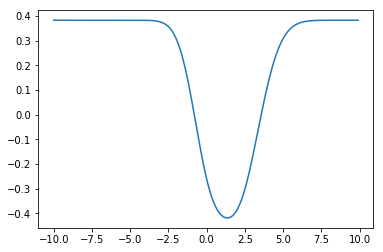

In [24]:
plt.plot(x,y)
#plt.ylim(-1, 2)
plt.show()
plt.close()

In [25]:
delta_opt = x[np.argmin(y)]

In [26]:
pd = [phi(t) for t in x]
pg = [phi(t-delta_opt) for t in x]
mal = [phi(t-m) for t in x]

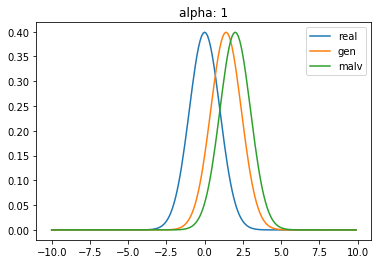

In [27]:
plt.plot(x,pd, label="real")
plt.plot(x,pg, label="gen")
plt.plot(x,mal, label="malv")
title = "alpha: " + str(alpha)
plt.title(title)
plt.legend()
plt.show()
plt.close()



In [28]:
x = np.arange(-10,10,.1)
y = [minmax(a,_x,delta,m,alpha, off, mu) for _x in x]

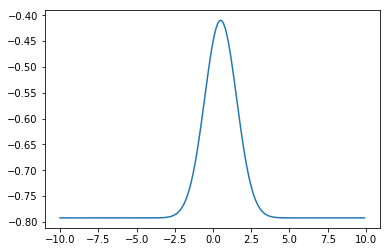

In [29]:
plt.plot(x,y)
#plt.ylim(-1, 2)
plt.show()
plt.close()

In [34]:
X = np.arange(-1, 1, 0.01)
Y =  np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)

In [35]:
Z = minmax(a,X,Y,m,alpha, off, mu)

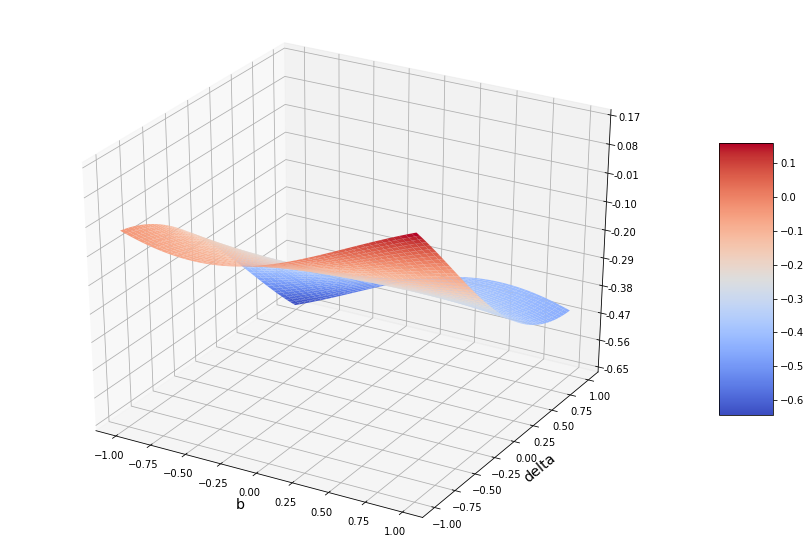

In [42]:

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, shade=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("b", fontsize="x-large")
plt.ylabel("delta", fontsize="x-large")
plt.show()
plt.close()